In [34]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer
from scipy import stats
from sklearn.pipeline import Pipeline

import statsmodels.api as sm

In [35]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)


/home/sdi1700187/MLCBAss1/Assignment-1


In [51]:
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# we load the two datasets
dev_set_df=pd.read_csv("../data/assignment1_dev_set.csv")
val_set_df=pd.read_csv("../data/assignment1_val_set.csv")


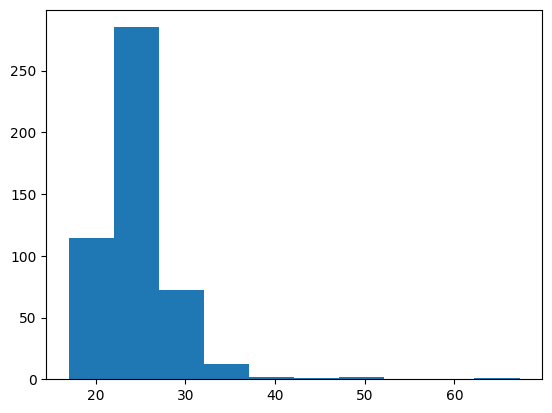

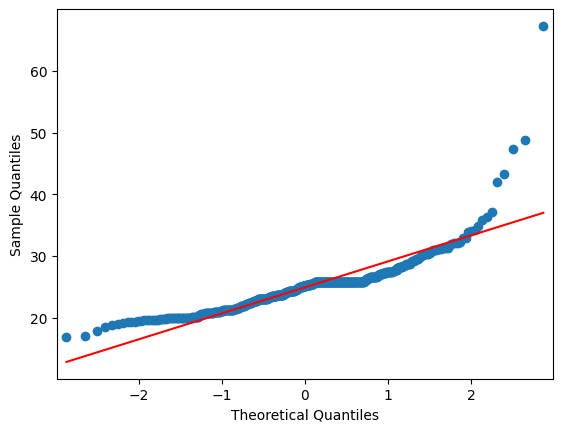

Statistics=0.793, p=0.000
BMI Sample does not look Gaussian (reject H0)


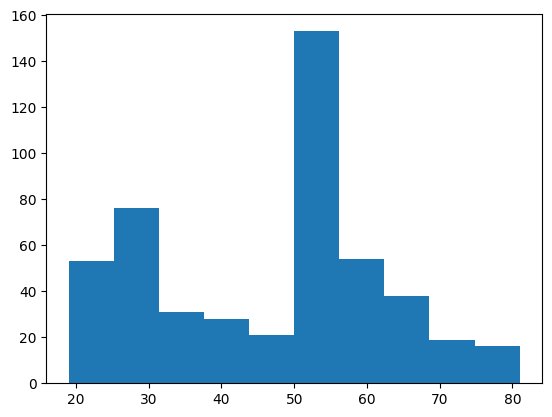

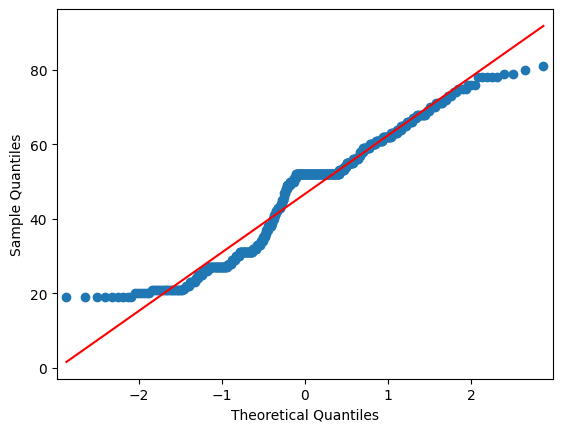

Statistics=0.948, p=0.000
Age Sample does not look Gaussian (reject H0)
Statistics=0.090, p=0.000
Acholeplasma axanthum Sample does not look Gaussian (reject H0)
Statistics=0.139, p=0.000
Acidaminococcus fermentans Sample does not look Gaussian (reject H0)
Statistics=0.410, p=0.000
Acidaminococcus intestini Sample does not look Gaussian (reject H0)
Statistics=0.123, p=0.000
Actinomyces lingnae Sample does not look Gaussian (reject H0)
Statistics=0.402, p=0.000
Akkermansia muciniphila Sample does not look Gaussian (reject H0)
Statistics=0.417, p=0.000
Alistipes finegoldii Sample does not look Gaussian (reject H0)
Statistics=0.226, p=0.000
Alistipes indistinctus Sample does not look Gaussian (reject H0)
Statistics=0.255, p=0.000
Alistipes obesi Sample does not look Gaussian (reject H0)
Statistics=0.413, p=0.000
Alistipes onderdonkii Sample does not look Gaussian (reject H0)
Statistics=0.635, p=0.000
Alistipes putredinis Sample does not look Gaussian (reject H0)
Statistics=0.548, p=0.000


In [ ]:
bmi=dev_set_df["BMI"]
age=dev_set_df["Host age"]
bacteria=get_bacteria(dev_set_df)

bacteria_names=bacteria.columns

normality_dict={}
mean_dict={}
std_dict={}
max_dict={}
min_dict={}
# we will get a general idea of our data
# starting with the BMI
mean_dict["BMI"],std_dict["BMI"],max_dict["BMI"],min_dict["BMI"]=rough_idea(bmi,"BMI")

# we will check the normality of the bmi
# first, we will get a rough idead visually
plot_for_normality(bmi)

# next we check properly, using the shapiro-wilk test for normality, with our null hypothesis being that the bmi data follow the normal distribution
# normality test
normality_dict["BMI"]=check_for_normality(bmi,"BMI")

# next, we move on to age
mean_dict["Age"],std_dict["Age"],max_dict["Age"],min_dict["Age"]=rough_idea(age,"Age")

# we will check the normality of the age
# first, we will get a rough idead visually
plot_for_normality(age)

# next we check properly, using the shapiro-wilk test for normality, with our null hypothesis being that the age data follow the normal distribution
# normality test
normality_dict["Age"]=check_for_normality(age,"Age")

# next, we move on to the bacteria
for bact in bacteria_names:
    bacterium=bacteria[bact]
    mean_dict[bact],std_dict[bact],max_dict[bact],min_dict[bact]=rough_idea(bacterium,bact)
    # plot_for_normality(bacterium) # plotting takes time and it's just more of a visual hint. we comment it for speed
    normality_dict[bact]=check_for_normality(bacterium,bact)

normal_columns=[]
non_normal_columns=[]

print_dict(normality_dict,mode="Normal")

normal_columns,non_normal_columns=find_normal(normality_dict)
print(f"There are {len(non_normal_columns)} NON NORMAL columns\n")

if(len(non_normal_columns)>0):
    print("These are:")
    for non_norm in non_normal_columns:
        print(non_norm)

print(f"There are {len(normal_columns)} NORMAL columns\n")

if(len(normal_columns)>0):
    print("These are:")
    for norm in normal_columns:
        print(norm)

print_dict(mean_dict,mode="Mean")
print_dict(std_dict,mode="Std")
print_dict(max_dict,mode="Max")
print_dict(min_dict,mode="Min")

In [39]:
# we clean the datasets
frames_dev=clean_data(dev_set_df)
frames_val=clean_data(val_set_df)

No duplicates in the set
No duplicates in the set


In [40]:
data_path=ass_path + "/data"

# we save the two clean datasets
save_clean_data(frames=frames_dev,mode="Dev",data_path=data_path)
save_clean_data(frames=frames_val,mode="Eval",data_path=data_path)

Creating dataframe for the clean data...
The shape of the clean dataframe is: (489, 137)
Saving final clean data to: /home/sdi1700187/MLCBAss1/Assignment-1/data/development_final_data.csv
Saved the clean dataframe at: /home/sdi1700187/MLCBAss1/Assignment-1/data/development_final_data.csv
Creating dataframe for the clean data...
The shape of the clean dataframe is: (211, 137)
Saving final clean data to: /home/sdi1700187/MLCBAss1/Assignment-1/data/evaluation_final_data.csv
Saved the clean dataframe at: /home/sdi1700187/MLCBAss1/Assignment-1/data/evaluation_final_data.csv
